In [2]:
!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 9.0 MB/s eta 0:00:00
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)


In [81]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [4]:
y = np.array([1, 2, 3, 4, 5])
x1 = np.array([6, 7, 8, 9, 10])
x2 = np.array([11, 12, 13, 14, 15])
X = np.vstack([np.ones(5), x1, x2, x1*x2]).T
X

array([[  1.,   6.,  11.,  66.],
       [  1.,   7.,  12.,  84.],
       [  1.,   8.,  13., 104.],
       [  1.,   9.,  14., 126.],
       [  1.,  10.,  15., 150.]])

In [5]:
beta, res, rank, sval = np.linalg.lstsq(X, y)
beta

C:\Users\LG\AppData\Local\Temp/ipykernel_68320/1061288593.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta, res, rank, sval = np.linalg.lstsq(X, y)


array([-5.55555556e-01,  1.88888889e+00, -8.88888889e-01, -8.88178420e-16])

In [6]:
data = {"y": y, "x1": x1, "x2": x2}
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1*x2", data)
y

DesignMatrix with shape (5, 1)
  y
  1
  2
  3
  4
  5
  Terms:
    'y' (column 0)

In [7]:
X

DesignMatrix with shape (5, 4)
  Intercept  x1  x2  x1:x2
          1   6  11     66
          1   7  12     84
          1   8  13    104
          1   9  14    126
          1  10  15    150
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x1:x2' (column 3)

In [8]:
type(X)

patsy.design_info.DesignMatrix

In [9]:
np.array(X)

array([[  1.,   6.,  11.,  66.],
       [  1.,   7.,  12.,  84.],
       [  1.,   8.,  13., 104.],
       [  1.,   9.,  14., 126.],
       [  1.,  10.,  15., 150.]])

In [10]:
df_data = pd.DataFrame(data)
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1:x2", df_data, return_type="dataframe")
X

,Intercept,x1,x2,x1:x2
0,1.0,6.0,11.0,66.0
1,1.0,7.0,12.0,84.0
2,1.0,8.0,13.0,104.0
3,1.0,9.0,14.0,126.0
4,1.0,10.0,15.0,150.0


In [11]:
model = sm.OLS(y, X)
result = model.fit()
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -8.881784e-16
dtype: float64

In [12]:
model = smf.ols("y ~ 1 + x1 + x2 + x1:x2", df_data)
result = model.fit()
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -8.881784e-16
dtype: float64

In [13]:
from collections import defaultdict
data = defaultdict(lambda: np.array([1,2,3]))
patsy.dmatrices("y ~ a", data=data)[1].design_info.term_names

['Intercept', 'a']

In [14]:
patsy.dmatrices("y ~ 1 + a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [15]:
patsy.dmatrices("y ~ -1 + a + b", data=data)[1].design_info.term_names

['a', 'b']

In [16]:
patsy.dmatrices("y ~ a * b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b']

In [17]:
patsy.dmatrices("y ~ a * b * c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c', 'a:b:c']

In [18]:
patsy.dmatrices("y ~ a * b * c - a:b:c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c']

In [19]:
data = {k: np.array([]) for k in ["y", "a", "b", "c"]}
patsy.dmatrices("y ~ a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [20]:
patsy.dmatrices("y ~ I(a + b)", data=data)[1].design_info.term_names

['Intercept', 'I(a + b)']

In [21]:
patsy.dmatrices("y ~ a*a", data=data)[1].design_info.term_names

['Intercept', 'a']

In [22]:
patsy.dmatrices("y ~ I(a**2)", data=data)[1].design_info.term_names

['Intercept', 'I(a ** 2)']

In [23]:
patsy.dmatrices("y ~ np.log(a) + b", data=data)[1].design_info.term_names

['Intercept', 'np.log(a)', 'b']

In [24]:
z = lambda x1, x2: x1+x2
patsy.dmatrices("y ~ z(a, b)", data=data)[1].design_info.term_names

['Intercept', 'z(a, b)']

In [25]:
data = {"y": [1, 2, 3], "a": [1, 2, 3]}
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]

,a
0,1.0
1,2.0
2,3.0


In [26]:
patsy.dmatrices("y ~ - 1 + C(a)", data=data, return_type="dataframe")[1]

,C(a)[1],C(a)[2],C(a)[3]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [27]:
data = {"y": [1, 2, 3], "a": ["type A", "type B", "type C"]}
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]

,a[type A],a[type B],a[type C]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [28]:
patsy.dmatrices("y ~ - 1 + C(a, Poly)", data=data, return_type="dataframe")[1]

,"C(a, Poly).Constant","C(a, Poly).Linear","C(a, Poly).Quadratic"
0,1.0,-7.071068e-01,0.408248
1,1.0,-5.551115e-17,-0.816497
2,1.0,7.071068e-01,0.408248


In [29]:
N = 100
x1 = np.random.randn(N)
x2 = np.random.randn(N)
data = pd.DataFrame({"x1": x1, "x2": x2})
def y_true(x1, x2):
    return 1  + 2 * x1 + 3 * x2 + 4 * x1 * x2
data["y_true"] = y_true(x1, x2)
e = np.random.randn(N)
data["y"] = data["y_true"] + e

In [30]:
model = smf.ols("y ~ x1 + x2", data)
result = model.fit()

In [31]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     27.43
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           3.62e-10
Time:                        19:33:45   Log-Likelihood:                -279.98
No. Observations:                 100   AIC:                             566.0
Df Residuals:                      97   BIC:                             573.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0241      0.410      2.499      0.0

In [32]:
result.rsquared

0.36123469020222043

In [33]:
result.resid.head()

0    1.173724
1    0.643578
2    3.126967
3   -0.116773
4   -3.106149
dtype: float64

In [34]:
z, p = stats.normaltest(result.resid.values)
p

5.766134496244908e-06

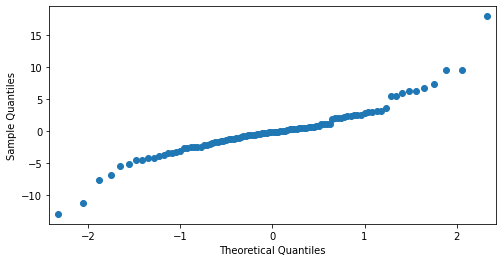

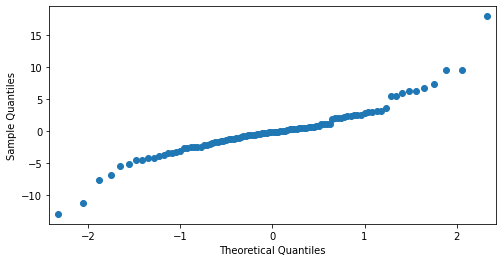

In [36]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

In [37]:
model = smf.ols("y ~ x1 + x2 + x1*x2", data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     913.4
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           2.03e-70
Time:                        19:35:08   Log-Likelihood:                -133.10
No. Observations:                 100   AIC:                             274.2
Df Residuals:                      96   BIC:                             284.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0110      0.095     10.663      0.0

In [39]:
result.rsquared

0.966151591562756

In [40]:
z, p = stats.normaltest(result.resid.values)
p

0.1720184187855037

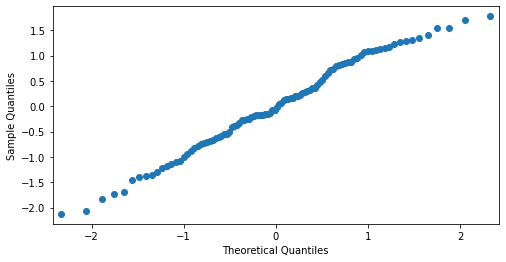

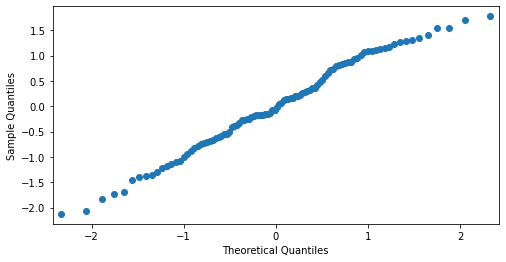

In [41]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

In [42]:
x = np.linspace(-1, 1, 50)
X1, X2 = np.meshgrid(x, x)
new_data = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})
y_pred = result.predict(new_data)
y_pred.shape

(2500,)

In [43]:
y_pred = y_pred.values.reshape(50, 50)

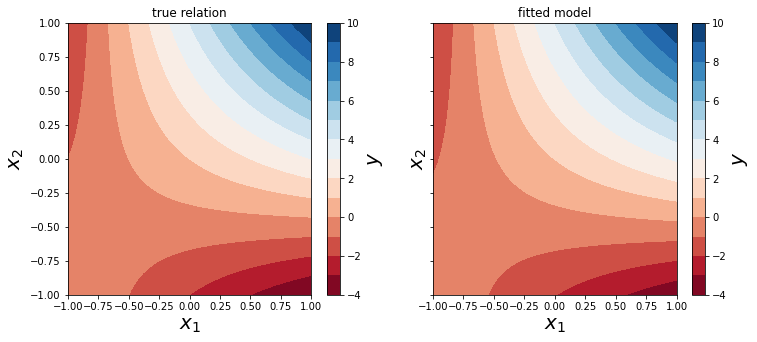

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

def plot_y_contour(ax, Y, title):
    c = ax.contourf(X1, X2, Y, 15, cmap=plt.cm.RdBu)
    ax.set_xlabel(r"$x_1$", fontsize=20)
    ax.set_ylabel(r"$x_2$", fontsize=20)
    ax.set_title(title)
    cb = fig.colorbar(c, ax=ax)
    cb.set_label(r"$y$", fontsize=20)

plot_y_contour(axes[0], y_true(X1, X2), "true relation")
plot_y_contour(axes[1], y_pred, "fitted model")

In [45]:
dataset = sm.datasets.get_rdataset("Icecream", "Ecdat")
dataset.title

'Ice Cream Consumption'

In [46]:
dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cons    30 non-null     float64
 1   income  30 non-null     int64  
 2   price   30 non-null     float64
 3   temp    30 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.1 KB


In [47]:
model = smf.ols("cons ~ -1 + price + temp", data=dataset.data)
result = model.fit()

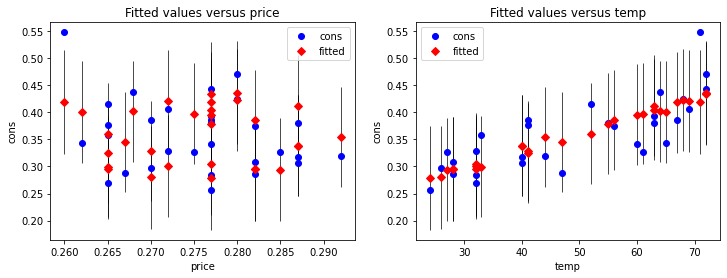

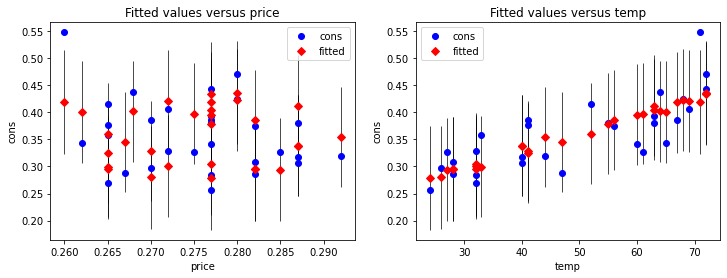

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

smg.plot_fit(result, 0, ax=ax1)
smg.plot_fit(result, 1, ax=ax2)


In [49]:
df = sm.datasets.get_rdataset("iris").data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [50]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [51]:
df_subset = df[df.Species.isin(["versicolor", "virginica"])].copy()
df_subset.Species = df_subset.Species.map({"versicolor": 1, "virginica": 0})
df_subset.rename(columns={"Sepal.Length": "Sepal_Length", "Sepal.Width": "Sepal_Width",
                          "Petal.Length": "Petal_Length", "Petal.Width": "Petal_Width"}, inplace=True)
df_subset.head(3)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1


In [52]:
model = smf.logit("Species ~ Sepal_Length + Sepal_Width + Petal_Length + Petal_Width", data=df_subset)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12


In [53]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Tue, 09 Aug 2022   Pseudo R-squ.:                  0.9142
Time:                        19:39:24   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       42.6378     25.708      1.659      0.097      -7.748      93.024
Sepal_Length     2.4652      2.394      1.030      0.303      -2.228       7.158
Sepal_Width      6.6809      4.480      1.49

In [54]:
print(result.get_margeff().summary())

        Logit Marginal Effects       
Dep. Variable:                Species
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Sepal_Length     0.0445      0.038      1.163      0.245      -0.031       0.120
Sepal_Width      0.1207      0.064      1.891      0.059      -0.004       0.246
Petal_Length    -0.1703      0.057     -2.965      0.003      -0.283      -0.058
Petal_Width     -0.3303      0.110     -2.998      0.003      -0.546      -0.114


In [57]:
model = smf.logit("Species ~ Petal_Length + Petal_Width", data=df_subset)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.102818
         Iterations 10


In [58]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Aug 2022   Pseudo R-squ.:                  0.8517
Time:                        19:50:01   Log-Likelihood:                -10.282
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 2.303e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2723     13.612      3.326      0.001      18.594      71.951
Petal_Length    -5.7545      2.306     -2.496      0.013     -10.274      -1.235
Petal_Width    -10.4467      3.756     -2.78

In [63]:
params = result.params
beta0 = -params['Intercept']/params['Petal_Width']
beta1 = -params['Petal_Length']/params['Petal_Width']

In [60]:
df_new = pd.DataFrame({"Petal_Length": np.random.randn(20)*0.5 + 5,
                       "Petal_Width": np.random.randn(20)*0.5 + 1.7})
df_new["P-Species"] = result.predict(df_new)
df_new["P-Species"].head(3)

0    0.006958
1    0.991097
2    0.989256
Name: P-Species, dtype: float64

In [61]:
df_new["Species"] = (df_new["P-Species"] > 0.5).astype(int)

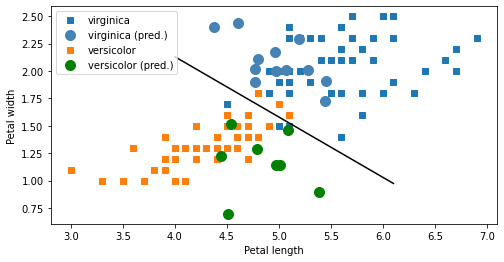

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(df_subset[df_subset.Species == 0].Petal_Length.values,
        df_subset[df_subset.Species == 0].Petal_Width.values, 's', label='virginica')
ax.plot(df_new[df_new.Species == 0].Petal_Length.values,
        df_new[df_new.Species == 0].Petal_Width.values,
        'o', markersize=10, color="steelblue", label='virginica (pred.)')

ax.plot(df_subset[df_subset.Species == 1].Petal_Length.values,
        df_subset[df_subset.Species == 1].Petal_Width.values, 's', label='versicolor')
ax.plot(df_new[df_new.Species == 1].Petal_Length.values,
        df_new[df_new.Species == 1].Petal_Width.values,
        'o', markersize=10, color="green", label='versicolor (pred.)')

_x = np.array([4.0, 6.1])
ax.plot(_x, beta0 + beta1 * _x, 'k')

ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend(loc=2)

In [65]:
dataset = sm.datasets.get_rdataset("discoveries")
df = dataset.data.set_index("time").rename(columns={"value": "discoveries"})
df.head(10).T

time,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869
discoveries,5,3,0,2,0,3,2,3,6,1


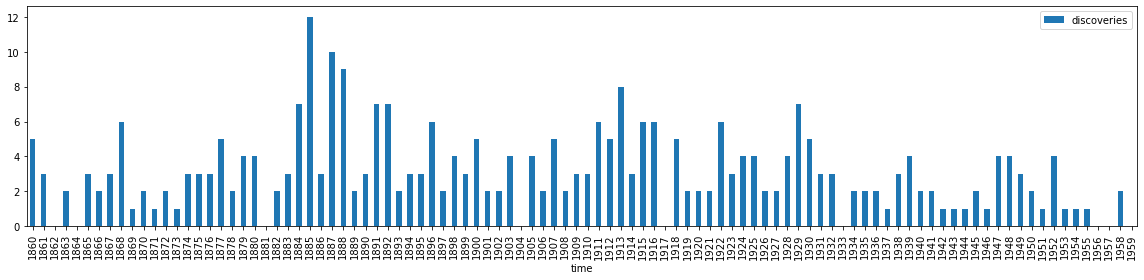

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
df.plot(kind='bar', ax=ax)
fig.tight_layout()
fig.savefig("ch14-discoveries.pdf")

In [67]:
model = smf.poisson("discoveries ~ 1", data=df)
result = model.fit()

Optimization terminated successfully.
         Current function value: 2.168457
         Iterations 1


In [68]:
print(result.summary())

                          Poisson Regression Results                          
Dep. Variable:            discoveries   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Tue, 09 Aug 2022   Pseudo R-squ.:                   0.000
Time:                        19:52:31   Log-Likelihood:                -216.85
converged:                       True   LL-Null:                       -216.85
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1314      0.057     19.920      0.000       1.020       1.243


In [69]:
lmbda = np.exp(result.params) 
X = stats.poisson(lmbda)
result.conf_int()

,0,1
Intercept,1.020084,1.242721


In [70]:
X_ci_l = stats.poisson(np.exp(result.conf_int().values)[0, 0])
X_ci_u = stats.poisson(np.exp(result.conf_int().values)[0, 1])
v, k = np.histogram(df.values, bins=12, range=(0, 12), normed=True)

C:\Users\LG\AppData\Local\Temp/ipykernel_68320/1057752835.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  v, k = np.histogram(df.values, bins=12, range=(0, 12), normed=True)


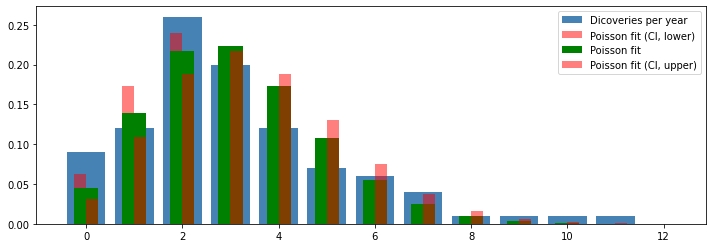

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.bar(k[:-1], v, color="steelblue",  align='center', label='Dicoveries per year') 
ax.bar(k-0.125, X_ci_l.pmf(k), color="red", alpha=0.5, align='center', width=0.25, label='Poisson fit (CI, lower)')
ax.bar(k, X.pmf(k), color="green",  align='center', width=0.5, label='Poisson fit')
ax.bar(k+0.125, X_ci_u.pmf(k), color="red",  alpha=0.5, align='center', width=0.25, label='Poisson fit (CI, upper)')

ax.legend()

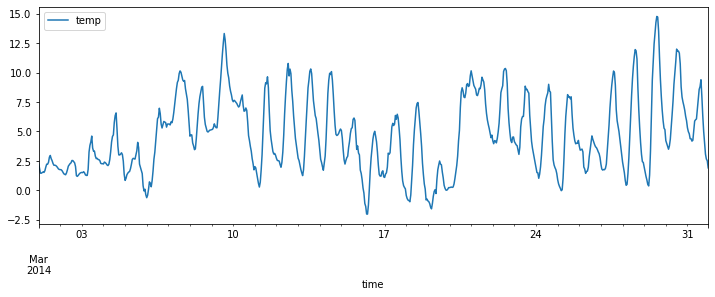

In [72]:
df = pd.read_csv("temperature_outdoor_2014.tsv", header=None, delimiter="\t", names=["time", "temp"])
df.time = pd.to_datetime(df.time, unit="s")
df = df.set_index("time").resample("H").mean()
df_march = df[df.index.month == 3]
df_april = df[df.index.month == 4]
df_march.plot(figsize=(12, 4));

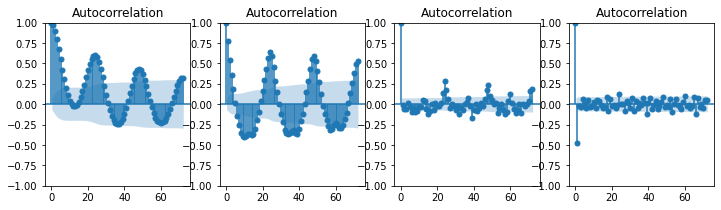

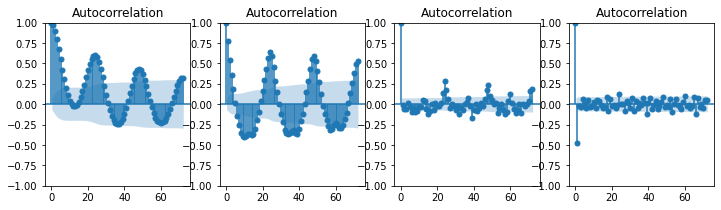

In [73]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
smg.tsa.plot_acf(df_march.temp, lags=72, ax=axes[0])
smg.tsa.plot_acf(df_march.temp.diff().dropna(), lags=72, ax=axes[1])
smg.tsa.plot_acf(df_march.temp.diff().diff().dropna(), lags=72, ax=axes[2])
smg.tsa.plot_acf(df_march.temp.diff().diff().diff().dropna(), lags=72, ax=axes[3])

In [82]:
model = statsmodels.tsa.ar_model.AutoReg(df_march.temp)
result = model.fit(72)
sm.stats.durbin_watson(result.resid)

TypeError: __init__() missing 1 required positional argument: 'lags'

In [ ]:
model = sm.tsa.AR(df_march.temp)
result = model.fit(72)
sm.stats.durbin_watson(result.resid)